In [1]:
import json
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import numpy as np 

# VQA v2 Training

In [2]:
questions = json.load(open("/kaggle/input/vqa-v2/VQA_v2/VQA_v2/Original/Questions.json"))
answers = json.load(open("/kaggle/input/vqa-v2/VQA_v2/VQA_v2/Original/Answers.json"))

In [3]:
print("Total Number of Images: ", len(os.listdir("/kaggle/input/vqa-v2/VQA_v2/VQA_v2/Images/train2014")))
print("Total Number of Questions: ", len(questions['questions']))
imageID2qcount = defaultdict(int)
for question in questions['questions']:
    imageID2qcount[question['image_id']] += 1
print("Average Number of Questions per Image: ", np.average(list(imageID2qcount.values())))

Total Number of Images:  82783
Total Number of Questions:  443757
Average Number of Questions per Image:  5.3604846405663


In [4]:
total_ques = len(questions['questions'])
len2perQues = defaultdict(int)
for question in questions['questions']:
    len2perQues[len(question['question'].split(' '))] += 1
L = []
for key in len2perQues:
    L.append([key, (len2perQues[key]/total_ques)*100])
L.sort()

NumWords_VQA_Q, percentage_VQA_Q = [L[i][0] for i in range(len(L))], [L[i][1] for i in range(len(L))]

In [5]:
with open('/kaggle/input/vqa-v2/mscoco_question_types.txt', 'r') as file:
    types = [line.strip() for line in file]
check = questions['questions']
types = sorted(types, key=len, reverse=True)
type_counts_vqa = {t: 0 for t in types}
for question in check:
    flag = 1
    for t in types:
        if question['question'].lower().strip().startswith(t):
            flag=0
            type_counts_vqa[t] += 1
            break
    if(flag):
        type_counts_vqa['none of the above'] += 1

In [6]:
total_questions_vqa = len(check)
filtered_counts_vqa = {key: (value/total_questions_vqa)*100 for key, value in type_counts_vqa.items() if key != "none of the above"}

In [7]:
total_ans = len(answers['annotations'])
len2perAns = defaultdict(int)
for answer in answers['annotations']:
    len2perAns[len(answer['multiple_choice_answer'].split(' '))] += 1
L = []
for key in len2perAns:
    L.append([key, (len2perAns[key]/total_ans)*100])
L.sort()

NumWords_VQA_A, percentage_VQA_A = [L[i][0] for i in range(len(L))], [L[i][1] for i in range(len(L))]

# VQA v2 Validation

In [8]:
questions = json.load(open("/kaggle/input/vqa-v2-val/VQA_v2_Val/VQA_v2_Val/v2_OpenEnded_mscoco_val2014_questions.json"))
answers = json.load(open("/kaggle/input/vqa-v2-val/VQA_v2_Val/VQA_v2_Val/v2_mscoco_val2014_annotations.json"))

In [9]:
print("Total Number of Images: ", len(os.listdir("/kaggle/input/vqa-v2-val/VQA_v2_Val/VQA_v2_Val/val2014/val2014")))
print("Total Number of Questions: ", len(questions['questions']))
imageID2qcount = defaultdict(int)
for question in questions['questions']:
    imageID2qcount[question['image_id']] += 1
print("Average Number of Questions per Image: ", np.average(list(imageID2qcount.values())))

Total Number of Images:  40504
Total Number of Questions:  214354
Average Number of Questions per Image:  5.292168674698795


In [10]:
total_ques = len(questions['questions'])
len2perQues = defaultdict(int)
for question in questions['questions']:
    len2perQues[len(question['question'].split(' '))] += 1
L = []
for key in len2perQues:
    L.append([key, (len2perQues[key]/total_ques)*100])
L.sort()

NumWords_VQA_val_Q, percentage_VQA_val_Q = [L[i][0] for i in range(len(L))], [L[i][1] for i in range(len(L))]

In [11]:
with open('/kaggle/input/vqa-v2/mscoco_question_types.txt', 'r') as file:
    types = [line.strip() for line in file]
check = questions['questions']
types = sorted(types, key=len, reverse=True)
type_counts_vqa_val = {t: 0 for t in types}
for question in check:
    flag = 1
    for t in types:
        if question['question'].lower().strip().startswith(t):
            flag=0
            type_counts_vqa_val[t] += 1
            break
    if(flag):
        type_counts_vqa_val['none of the above'] += 1

In [12]:
total_questions_vqa_val = len(check)
filtered_counts_vqa_val = {key: (value/total_questions_vqa_val)*100 for key, value in type_counts_vqa_val.items() if key != "none of the above"}

In [13]:
total_ans = len(answers['annotations'])
len2perAns = defaultdict(int)
for answer in answers['annotations']:
    len2perAns[len(answer['multiple_choice_answer'].split(' '))] += 1
L = []
for key in len2perAns:
    L.append([key, (len2perAns[key]/total_ans)*100])
L.sort()

NumWords_VQA_val_A, percentage_VQA_val_A = [L[i][0] for i in range(len(L))], [L[i][1] for i in range(len(L))]

# DAQUAR

In [14]:
answers_pred = json.load(open("/kaggle/input/daquar/Prediction.json"))

In [15]:
print("Total Number of Images: ", len(os.listdir("/kaggle/input/daquar/DAQUAR/DAQUAR/images")))
print("Total Number of Questions: ", len(answers_pred))
imageID2qcount = defaultdict(int)
for d in answers_pred:
    imageID2qcount[d['image_dir']] += 1
print("Average Number of Questions per Image: ", np.average(list(imageID2qcount.values())))

Total Number of Images:  1449
Total Number of Questions:  12468
Average Number of Questions per Image:  8.61644782308224


In [16]:
total_ques = len(answers_pred)
len2perQues = defaultdict(int)
for d in answers_pred:
    len2perQues[len(d['question'].split(' '))] += 1
L = []
for key in len2perQues:
    L.append([key, (len2perQues[key]/total_ques)*100])
L.sort()

NumWords_DAQUAR_Q, percentage_DAQUAR_Q = [L[i][0] for i in range(len(L))], [L[i][1] for i in range(len(L))]

In [17]:
total_ques = len(answers_pred)
len2perAns = defaultdict(int)
for d in answers_pred:
    len2perAns[len(d['answer'].split('_'))] += 1
L = []
for key in len2perAns:
    L.append([key, (len2perAns[key]/total_ques)*100])
L.sort()

NumWords_DAQUAR_A, percentage_DAQUAR_A = [L[i][0] for i in range(len(L))], [L[i][1] for i in range(len(L))]

In [18]:
with open('/kaggle/input/vqa-v2/mscoco_question_types.txt', 'r') as file:
    types = [line.strip() for line in file]

types = sorted(types, key=len, reverse=True)
type_counts_daquar = {t: 0 for t in types}
for question in answers_pred:
    flag = 1
    for t in types:
        if question['question'].lower().strip().startswith(t):
            flag=0
            type_counts_daquar[t] += 1
            break
    if(flag):
        type_counts_daquar['none of the above'] += 1

In [19]:
total_questions_daquar = len(answers_pred)
filtered_counts_daquar = {key: (value/total_questions_daquar)*100 for key, value in type_counts_daquar.items() if key != "none of the above"}

----------------------------------------------------------------------------------

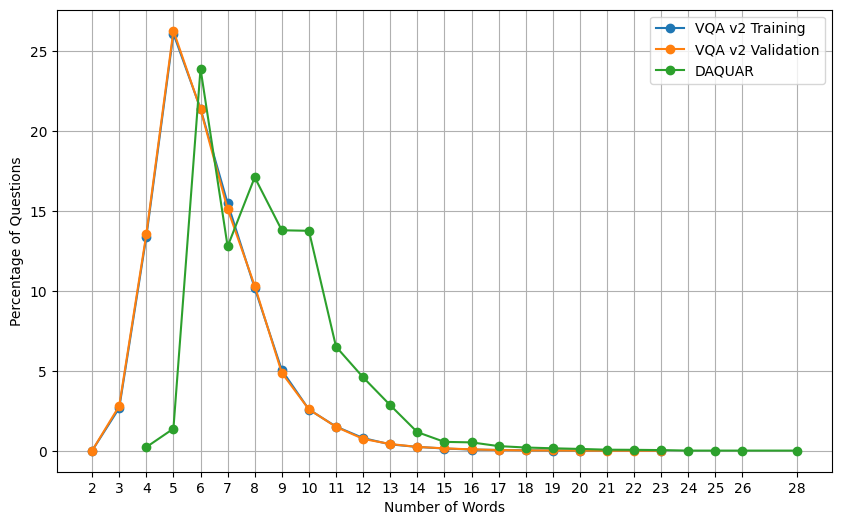

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(NumWords_VQA_Q, percentage_VQA_Q, marker='o')
plt.plot(NumWords_VQA_val_Q, percentage_VQA_val_Q, marker='o')
plt.plot(NumWords_DAQUAR_Q, percentage_DAQUAR_Q, marker='o')
plt.grid(True)
plt.xlabel('Number of Words')
plt.ylabel('Percentage of Questions')
plt.legend(['VQA v2 Training', 'VQA v2 Validation', 'DAQUAR'])
plt.xticks(list(set(NumWords_VQA_Q + NumWords_DAQUAR_Q + NumWords_VQA_val_Q)))
plt.show()

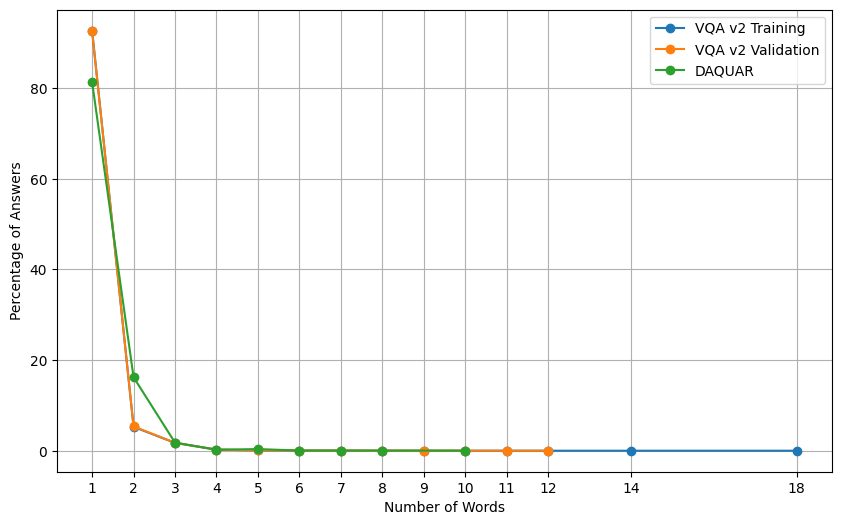

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(NumWords_VQA_A, percentage_VQA_A, marker='o')
plt.plot(NumWords_VQA_val_A, percentage_VQA_val_A, marker='o')
plt.plot(NumWords_DAQUAR_A, percentage_DAQUAR_A, marker='o')
plt.grid(True)
plt.xlabel('Number of Words')
plt.ylabel('Percentage of Answers')
plt.legend(['VQA v2 Training', 'VQA v2 Validation', 'DAQUAR'])
plt.xticks(list(set(NumWords_VQA_A + NumWords_DAQUAR_A + NumWords_VQA_val_A)))
plt.show()

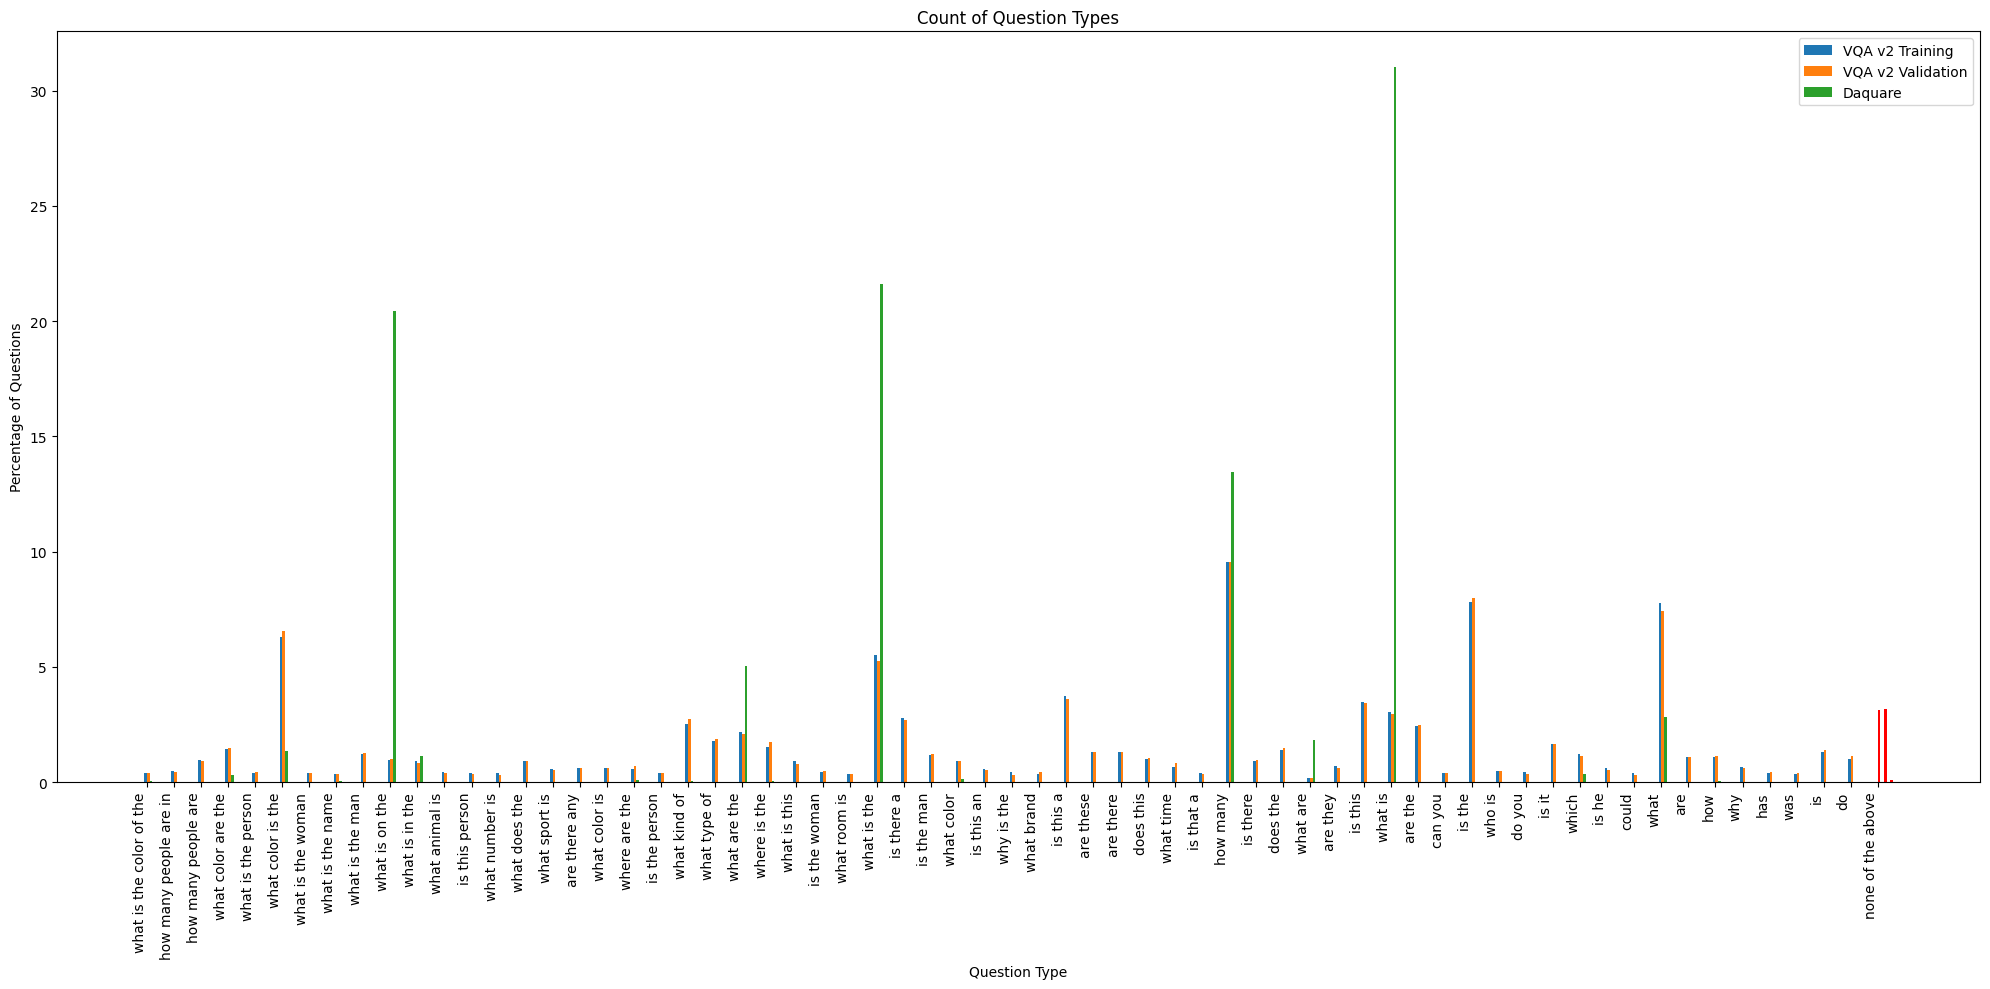

In [22]:
bar_width = 0.10
x_vqa = np.arange(len(filtered_counts_vqa))
x_vqa_val = np.arange(len(filtered_counts_vqa_val)) + bar_width
x_daquare = np.arange(len(filtered_counts_daquar)) + 2*bar_width

plt.figure(figsize=(20, 10))
plt.bar(x_vqa, filtered_counts_vqa.values(), width=bar_width, label='VQA v2 Training')
plt.bar(x_vqa_val, filtered_counts_vqa_val.values(), width=bar_width, label='VQA v2 Validation')
plt.bar(x_daquare, filtered_counts_daquar.values(), width=bar_width, label='Daquare')

plt.bar(len(filtered_counts_vqa) + bar_width, (type_counts_vqa.get("none of the above", 0)/total_questions_vqa)*100, color='r', width=bar_width)
plt.bar(len(filtered_counts_vqa) + 3.5 * bar_width, (type_counts_vqa_val.get("none of the above", 0)/total_questions_vqa_val)*100, color='r', width=bar_width)
plt.bar(len(filtered_counts_vqa) + 5.5 * bar_width, (type_counts_daquar.get("none of the above", 0)/total_questions_daquar)*100, color='r', width=bar_width)


plt.xlabel('Question Type')
plt.ylabel('Percentage of Questions')
plt.title('Count of Question Types')
plt.xticks(np.arange(len(filtered_counts_vqa) + 1) + bar_width / 2, list(filtered_counts_vqa.keys()) + ["none of the above"])
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()